<a href="https://colab.research.google.com/github/MajiroZ/for_git_study/blob/master/Housing_Information_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##【問題1】データセットの取得

In [3]:
import pandas as pd
pd.read_csv('/train.csv')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


##【問題2】データセット自体の調査

Kaggleの「House Prices - Advanced Regression Techniques」は、不動産価格の予測を目的としたデータセット。

### 主な内容
- **目的**: アメリカ・アイオワ州エイムズ市の住宅価格を予測するために、さまざまな住宅特性を利用して回帰モデルを構築する。
- **ターゲット変数**: `SalePrice`（住宅の販売価格）。
- **特徴量**: 79個の説明変数（住宅の物理的特性や立地など）が含まれている。

### データ構造
1. **説明変数の種類**
   - **カテゴリカルデータ**: 地区 (`Neighborhood`)、住宅のスタイル (`HouseStyle`)、外装 (`Exterior1st` など) など。
   - **数値データ**: 建築面積 (`GrLivArea`)、築年数 (`YearBuilt`)、部屋数 (`TotRmsAbvGrd`)、敷地面積 (`LotArea`) など。
2. **欠損値**: データには欠損値が含まれており、前処理が必要。
3. **目的変数**: `SalePrice`（販売価格）で、対数変換が必要な場合が多い（価格分布が右に偏っているため）。

### データ量
- 訓練データ: 1460件
- テストデータ: 1459件

### 主な課題
- **欠損値の処理**: 欠損データが多いため、適切な処理が必要。
- **データのスケーリング**: モデルによっては特徴量をスケーリングする必要がある。
- **カテゴリカルデータのエンコーディング**: ラベルエンコーディングやワンホットエンコーディングが有用。
- **特徴量の選択・エンジニアリング**: 特徴量間の相関や、モデルの解釈性を考慮した選択。

### 主な活用ケース
- **回帰モデルの学習**: ランダムフォレスト、グラディエントブースティング、ニューラルネットワークなどのアルゴリズムを試す。
- **モデルの評価**: RMSEやR²スコアを用いてモデル性能を比較。

### このデータセットの魅力
初心者から中級者にとって、回帰分析のスキルを実践的に学ぶための優れた教材。データ前処理や特徴量エンジニアリングの重要性が体験できるらしい。

##【問題3】データの確認

###説明変数の種類
**カテゴリカルデータ**:
 地区 (Neighborhood)、住宅のスタイル (HouseStyle)、外装 (Exterior1st など) など。
**数値データ**:
 建築面積 (GrLivArea)、築年数 (YearBuilt)、部屋数 (TotRmsAbvGrd)、敷地面積 (LotArea) など。

**目的変数**: `SalePrice`（販売価格）で、対数変換が必要な場合が多い（価格分布が右に偏っているため）。

In [4]:
df = pd.read_csv('/train.csv')

In [5]:
# 統計量の表示
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

##【問題4】欠損値への対応

In [6]:
!pip install missingno
import missingno as msno

In [7]:
# 各列の欠損値数を確認
print(df.isnull().sum())

# 各列の欠損値割合を確認
print(df.isnull().mean() * 100)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


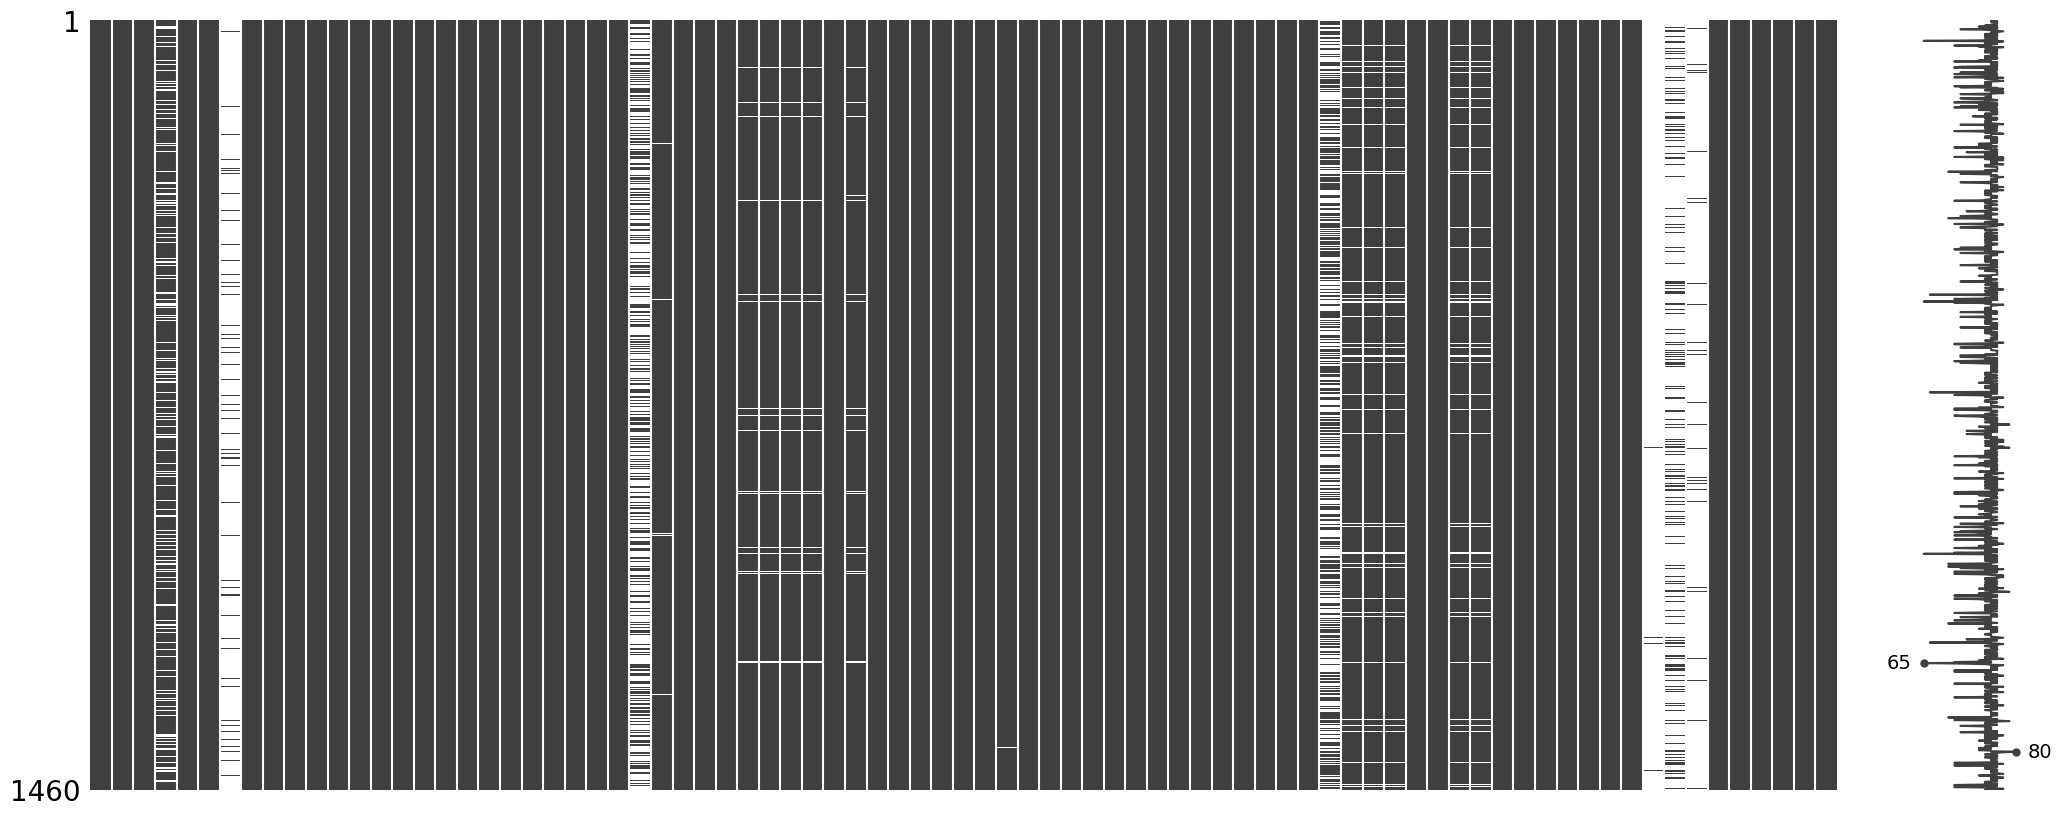

In [9]:
import matplotlib.pyplot as plt
msno.matrix(df)
plt.show()

In [10]:
# 5つ以上欠損値がある特徴量（列）を削除する

import pandas as pd

# 各列の欠損値の個数を数える
missing_counts = df.isnull().sum()

# 5つ以上の欠損値のある列を特定する
columns_to_drop = missing_counts[missing_counts >= 5].index

# 削除
df = df.drop(columns=columns_to_drop)

print(df.head())

   Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    Inside       Gtl  ...             0         0           0        0   
1       FR2       Gtl  ...             0         0           0        0   
2    Inside       Gtl  ...             0         0           0        0   
3    Corner       Gtl  ...           272         0           0        0   
4       FR2       Gtl  ...             0         0           0        0   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0       0       2    20

In [11]:
#5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）を削除する

# 欠損値のある行を特定する
lines_to_drop = df[df.isnull().any(axis=1)].index

# 削除
df = df.drop(index=lines_to_drop)

print(df.head())

   Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    Inside       Gtl  ...             0         0           0        0   
1       FR2       Gtl  ...             0         0           0        0   
2    Inside       Gtl  ...             0         0           0        0   
3    Corner       Gtl  ...           272         0           0        0   
4       FR2       Gtl  ...             0         0           0        0   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0       0       2    20

##【問題5】用語の調査

データの分布形状を特徴づける統計量

---

### 1. **尖度 (Kurtosis)**

#### 概要
尖度は分布の**「鋭さ」や「尾の重さ」**を示す。データが正規分布（ガウス分布）に近い形状か、ピークが鋭い（尖っている）か、あるいは平らで尾が重いかを評価する。

- **尖度が高い**（>3）：分布は鋭く尖り、尾が軽い（例：裾野が狭く山が高い形状）。
- **尖度が低い**（<3）：分布は平らで尾が重い（例：裾野が広がって平坦な形状）。

#### 計算式
尖度 $(K$) は以下のように計算される：

$K = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^4$

ここで：
- $(n$)：データの数
- $(x_i$)：各データ値
- $(\bar{x}$)：平均
- $(s$)：標準偏差

Pythonでは`scipy`を使うと簡単に計算できる。

```python
from scipy.stats import kurtosis

data = [1, 2, 3, 4, 5]
kurt = kurtosis(data, fisher=True)  # Fisher=Trueで正規分布の尖度が0になる
print("尖度:", kurt)
```

---

### 2. **歪度 (Skewness)**

#### 概要
歪度は分布の**「非対称性」**を示す。データが左右どちらに偏っているかを評価する。

- **歪度 > 0**：右に尾が長い（右に偏っている）。
- **歪度 < 0**：左に尾が長い（左に偏っている）。
- **歪度 ≈ 0**：左右対称で正規分布に近い。

#### 計算式
歪度 (\(S\)) は以下のように計算されます：

$S = \frac{1}{n} \sum_{i=1}^{n} \left( \frac{x_i - \bar{x}}{s} \right)^3$


ここで：
- $(n)$：データの数
- $(x_i)$：各データ値
- $(\bar{x})$：平均
- $(s)$：標準偏差

Pythonでは以下のように計算する：

```python
from scipy.stats import skew

data = [1, 2, 3, 4, 5]
skewness = skew(data)
print("歪度:", skewness)
```

---

### 3. **尖度と歪度の利用例**
- **正規性の検定**：データが正規分布を仮定している場合に、尖度や歪度を確認して正規性を評価。
- **分布の特徴把握**：データの特徴を直感的に理解。
- **モデルの選択**：例えば、非対称な分布に適した回帰モデルや変換の選択。

---

### 4. **補足**
- 正規分布では、尖度は通常「3」、歪度は「0」に近くなる。
- 実際のデータ分析では、尖度や歪度が極端に大きい場合に対策（例：データ変換や外れ値の処理）を検討することが一般的。

##【問題6】分布の確認

目的変数の分布を表示し、「尖度」と「歪度」も算出する。

<ipython-input-12-949a054b85b8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

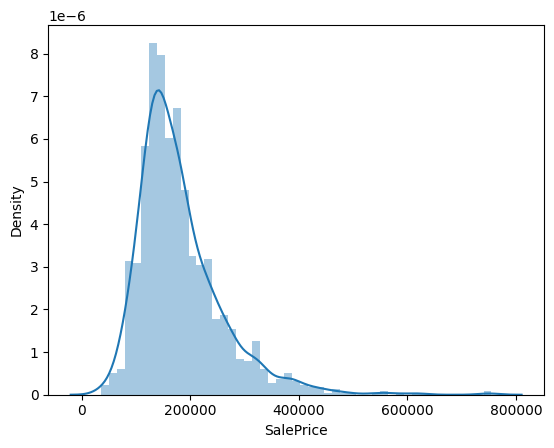

In [12]:
import seaborn as sns
sns.distplot(df['SalePrice'])

In [13]:
from scipy.stats import kurtosis

kurt = kurtosis(df['SalePrice'], fisher=True)  # Fisher=Trueで正規分布の尖度が0になる
print("尖度:", kurt)

尖度: 6.502799105301849


In [14]:
from scipy.stats import skew

skewness = skew(df['SalePrice'])
print("歪度:", skewness)

歪度: 1.880007613681095


目的変数に対して対数変換を行う。

対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

<ipython-input-15-fb0971ca82ca>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice_log'])


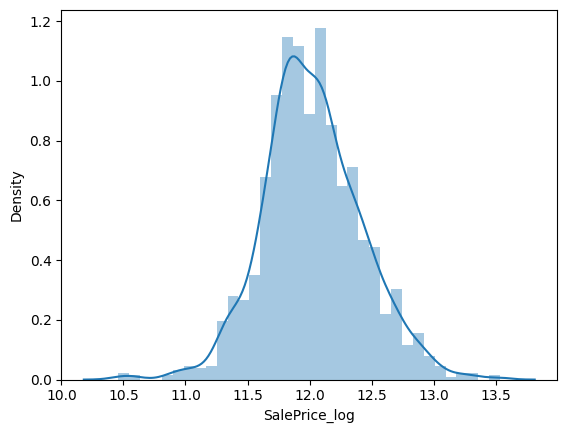

対数変換後の尖度: 0.8000427774841801
対数変換後の歪度: 0.1212045355432411


In [15]:
# SalePriceの対数変換を行う

import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
import numpy as np

# 目的変数に対して対数変換を行う。
df['SalePrice_log'] = np.log1p(df['SalePrice'])

# 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
sns.distplot(df['SalePrice_log'])
plt.show()

kurt_log = kurtosis(df['SalePrice_log'], fisher=True)
print("対数変換後の尖度:", kurt_log)

skewness_log = skew(df['SalePrice_log'])
print("対数変換後の歪度:", skewness_log)

対数変換を行うことで、左右非対称で左側に偏っていたSalePriceの分布が左右対称に近づいた（歪度が0に近づいた）。
一方で、尖度は6.5から約1程度に下がりなだらかになった。正規分布とされる尖度3よりもさらに裾野が広がる形になったと言える。

##【問題7】相関係数の確認

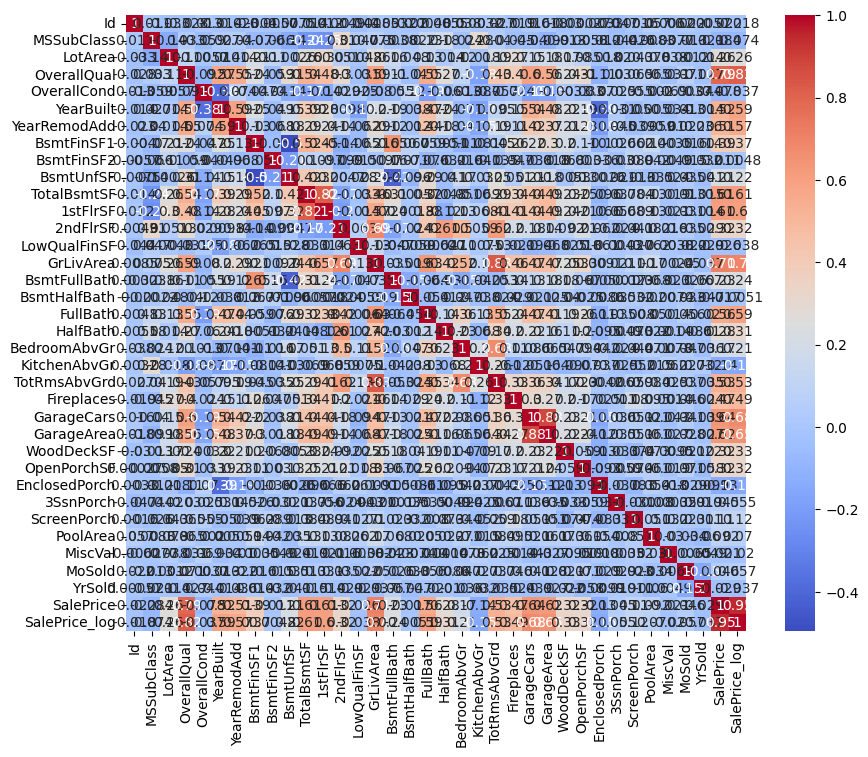

In [16]:
#相関係数行列のヒートマップを作る
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

####相関係数の高い関係
- 目的変数である価格との正の相関が大きいもの
  - OverallQual
  - YearBuilt
  - YearRemodAdd
  - TotalBsmtSF
  - 1stFlrSF
  - GLivArea
  - FullBath
  - TotRmsAbvGrd
  - Fireplaces
  - GarageCars
  - GarageArea
- その他で特に相関が大きいもの
  - TotRmsAbvGrdとGrLivArea（正の相関）
  - 1stFlrSFとTotalBsmtSF（正の相関）
  - GarageAreaとGarageCars（正の相関）
  - BsmtUnfSFとBsmtFinSF1（負の相関）
  - BsmtFullBathとBsmtFinSF1（負の相関）

In [20]:
# 目的変数との相関係数の絶対値が高い順にソート
corr_with_target = numeric_df.corr()['SalePrice_log'].abs().sort_values(ascending=False)

# 上位10個の特徴量を選択
top_10_features = corr_with_target.index[1:12]  # SalePrice_log自身を除く

top_10_features

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
       'TotRmsAbvGrd'],
      dtype='object')

<Axes: >

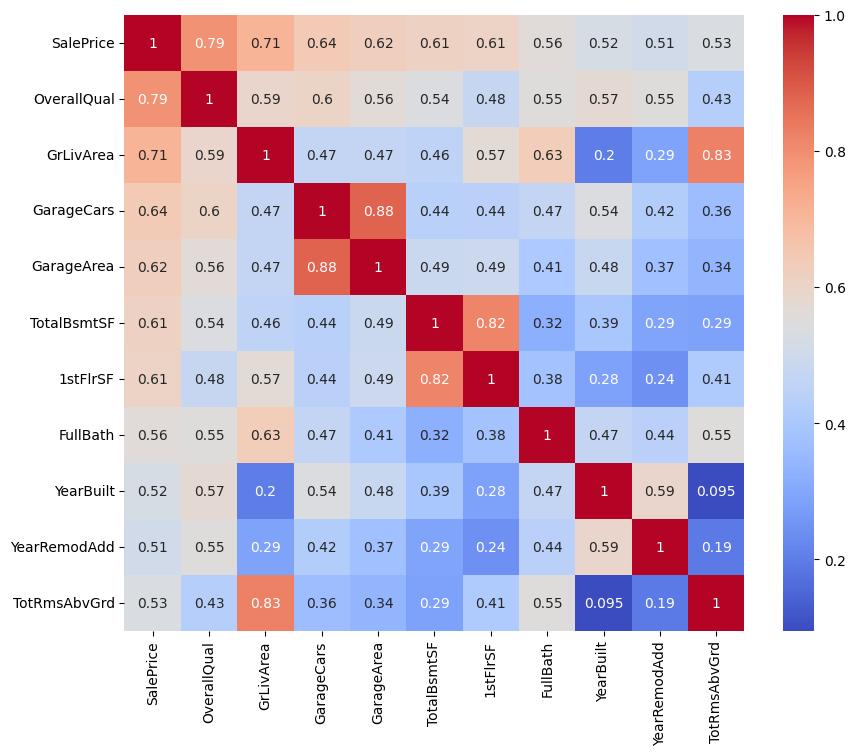

In [21]:
#top_10_featuresのみの相関係数行列ヒートマップを作る
plt.figure(figsize=(10, 8))
numeric_df_top10 = numeric_df[top_10_features]
sns.heatmap(numeric_df_top10.corr(), annot=True, cmap='coolwarm')

価格と相関の大きかったそれぞれの特徴量は、以下を表している。
- OverallQual： 全体的な素材と仕上げの品質
- GrLivArea： 地上の居住面積（平方フィート）
- GarageCars： 車庫の大きさ
- GarageArea： ガレージの広さ（平方フィート）
- TotalBsmtSF：地下室の面積の合計（平方フィート）
- 1FlrSF：1階の平方フィート
- FullBath： 地上のフルバスルーム
- YearBuilt： 元の建設日
- YearRemodAdd： リフォーム年月日
- TotRmsAbvGrd ： 地上の総居室数（バスルームは含まない）
全体のクオリティの他は、家の面積に関わる指標や部屋の数、築年数に関わる指標が特に価格との相関が大きいことが分かる。

これら10の特徴量間では、
1. 車庫の大きさとガレージの広さ：相関0.88
2. 地上の居住面積と地上の総居室数：相関 0.83
3. 1階の面積と地下室の面積合計：相関 0.82
これら3組が、お互いの相関係数が高い組み合わせである。